#  Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

To analyse different aspects of Diabetes in the Pima Indians tribe.

-------------------------
## Feature descriptions
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as plt
%matplotlib inline

## Load dataset 

In [3]:
pima = pd.read_csv("./diabetes.csv")

In [4]:
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Interpretation: 


- 9 columns. To answer than the code line 5 showed that
- There are 9 columns/dimensions/features/variables and 768 rows/observations
- All the variables are numeric

In [6]:
pima.size

6912

- Since there are 9 dimensions and 768 observations. The size would be 9*768 = 6912

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Variables: DiabetesPedigreeFunction and BMI are floating point
- the rest of 7 variables (Outcome, Age, Insulin, SkinThickness, BloodPressure, Glucose, Pregnancies) are in integer

In [8]:
pima.isnull()
# pima.isnull().values.any()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [14]:
# Lets check if columns have any value other than numeric i.e ?

pima[~pima.apply(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


- There is no missing value in the Pima dataframe. Missing value is considered as no value for a data point.
- All the columns contain numeric values 

In [11]:
# pima.describe().transpose()
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.675781,30.436252,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,26.447917,9.733872,7.000,20.00000,23.0000,32.00000,99.00
Insulin,768.0,118.270833,93.243829,14.000,79.00000,79.0000,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### Interpretation: 

Summary statistics give a general view of the distribution of a dataframe, inlcuding mean, median, mode, standard deviation/variability, 25% percentile, 50% percentile, 75% percentile, minimum and maximum value. For example:
- There are 768 paricipants included in this dataframe.
- The mean of Age is 33.24. The average age of the participants in this dataframe is 33.24.
- The standard deviation is 11.76 or nearly 12 years. This means the variability of participants in terms of Age is quite large.
- The minimum age is 21. So the youngest participant(s) as be as young as 21.
- The maximum age is 81. So the oldest participant(s) as be as old as 81.
- 25% of Pima are 24 years old or below.
- 50% of Pima are 29 years old or below.
- 75% of Pima are 41 years old or below. 

Again, the percetile figures reconfirmed that the variability of participants in terms of Age is quite large.

In [17]:
#Convert the target column to a categorical variable
pima['Outcome']=pima['Outcome'].astype('category')

<Axes: xlabel='Outcome', ylabel='count'>

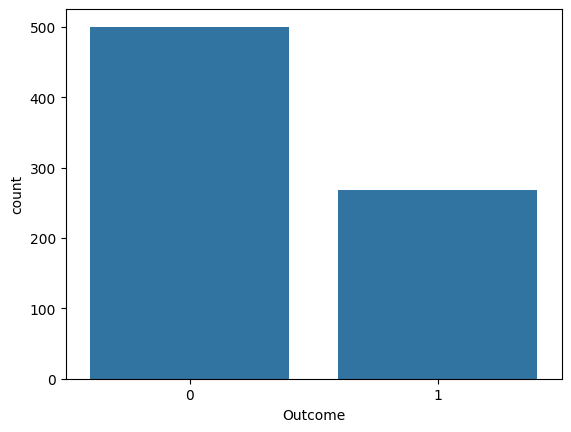

In [19]:
#Distribution of the target class
sns.countplot(pima, x ='Outcome')

In [20]:
pima['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

##### Observation
- The positive class or class 1 (people having diabetes) is 35% anf the class 0 is 65%

## Data Visualization

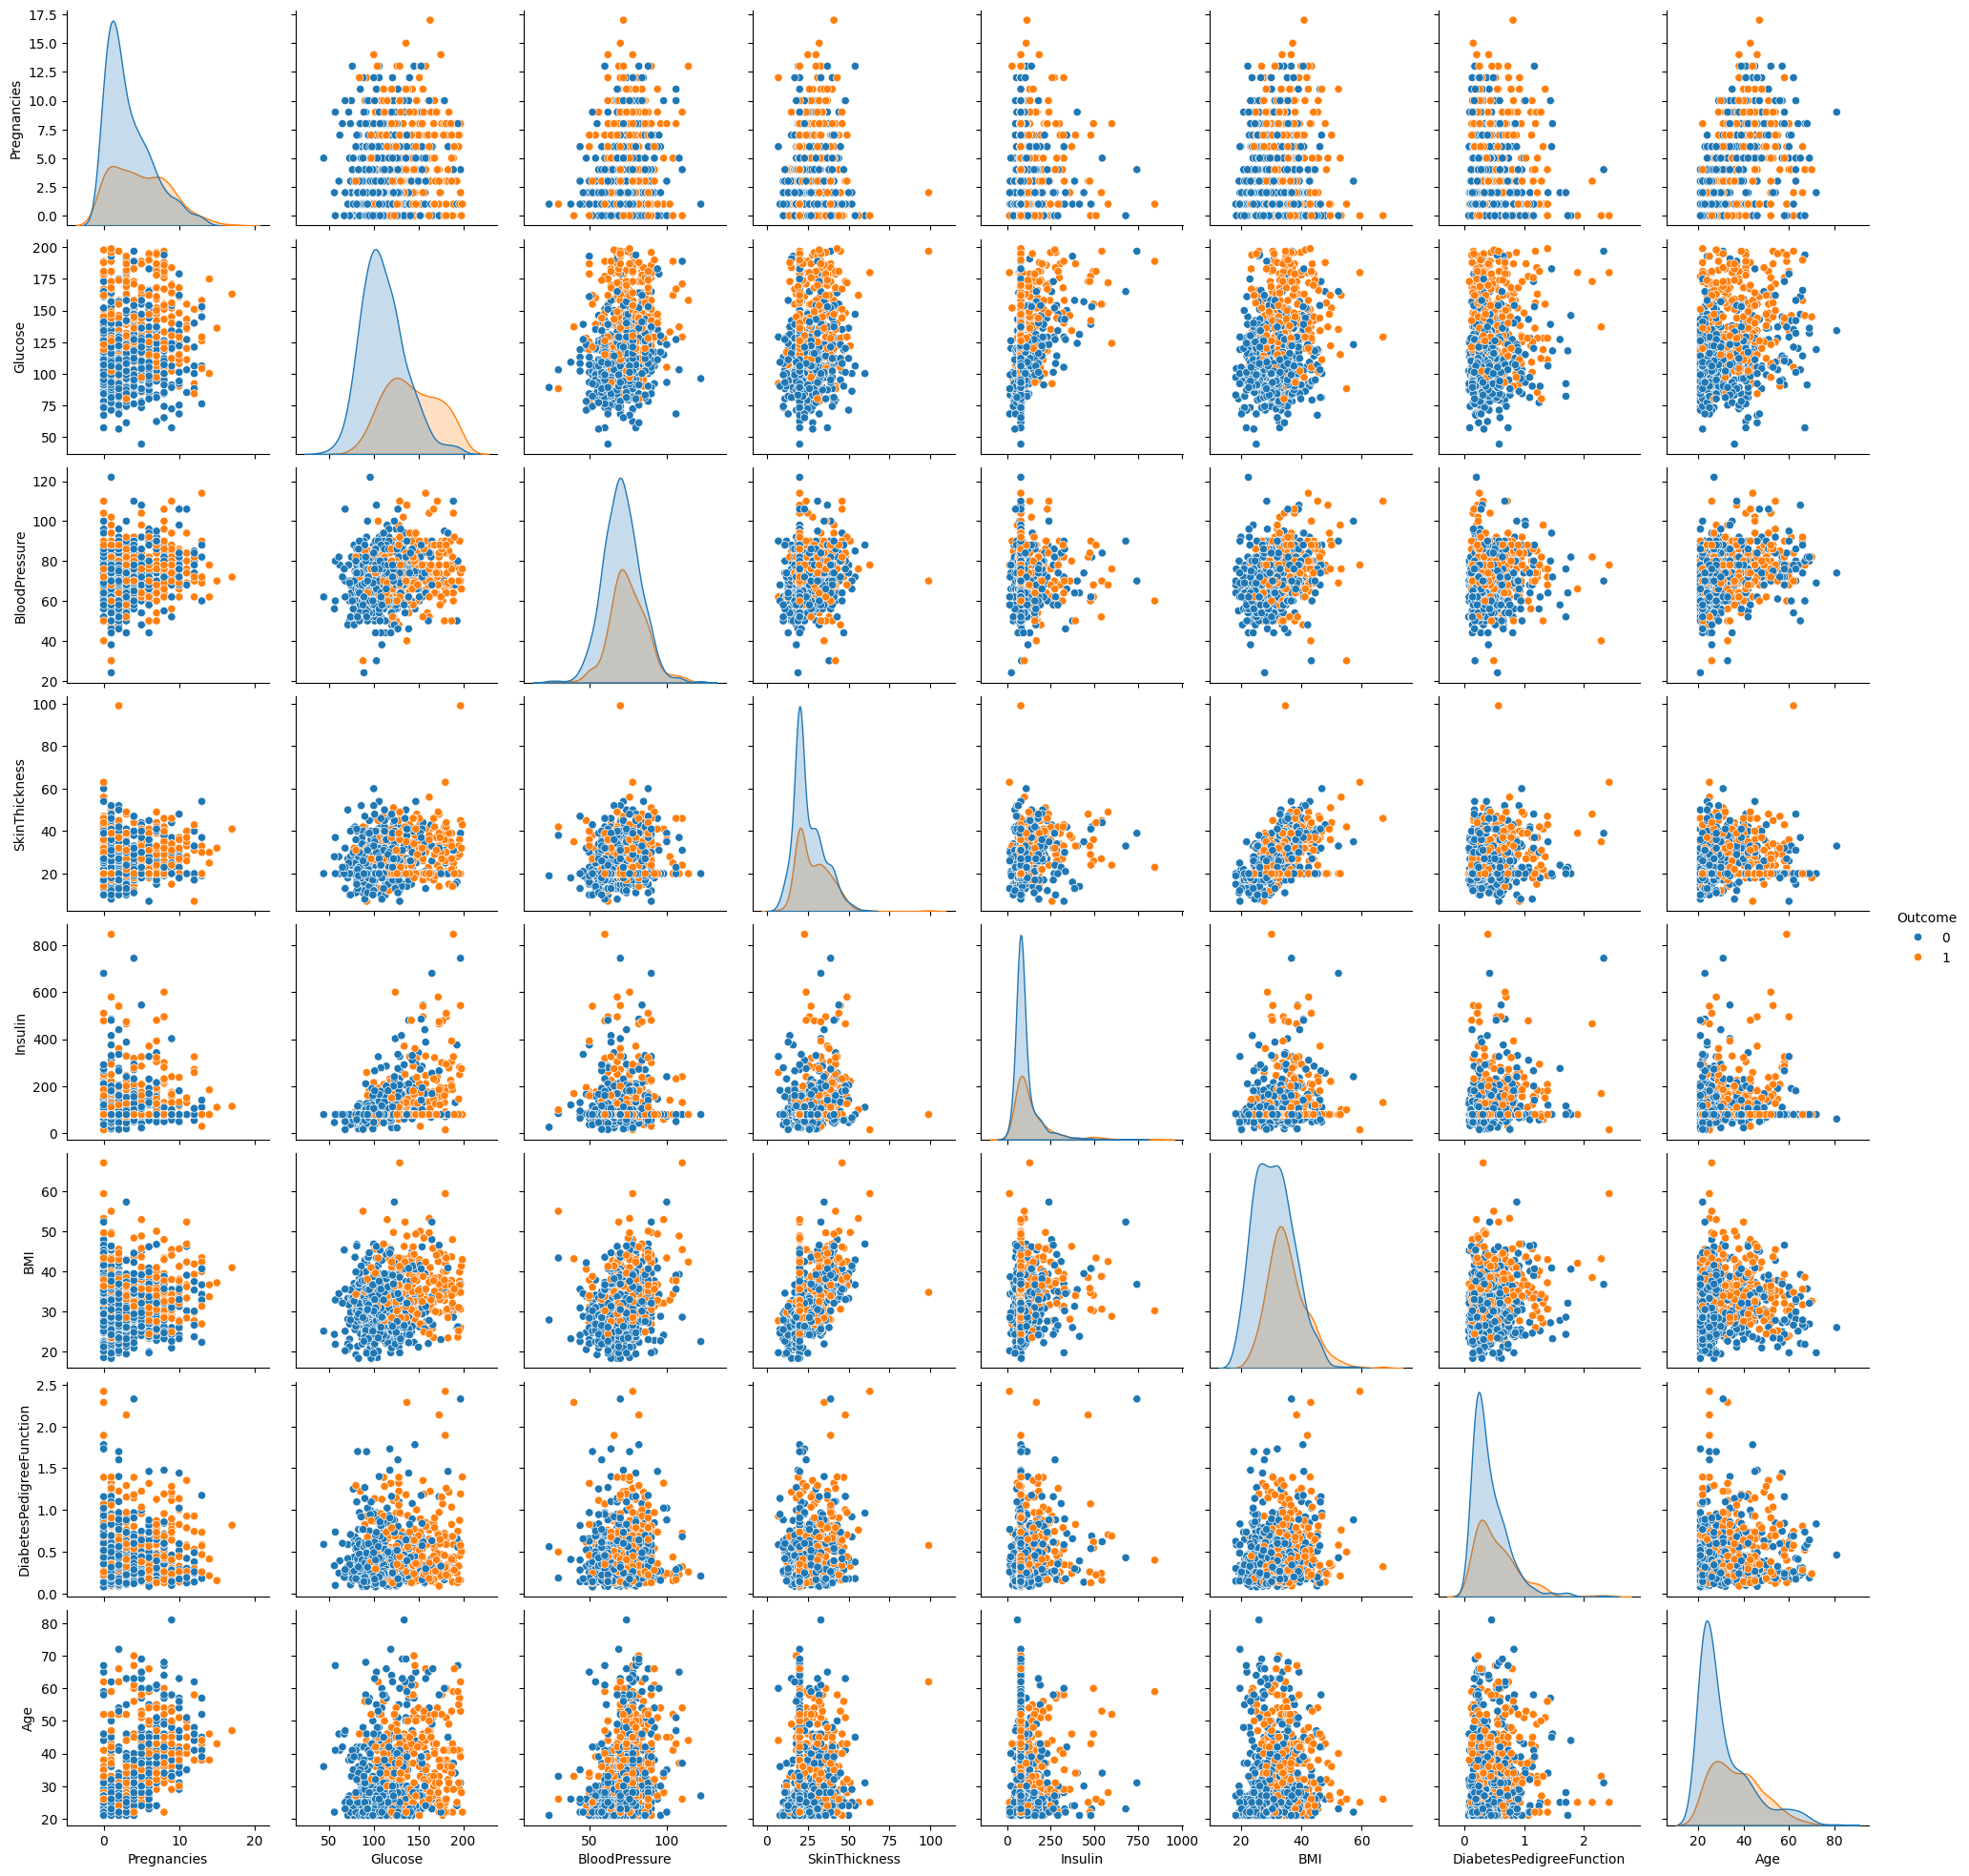

In [27]:
sns.pairplot(pima, hue='Outcome')
# sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
# plt.show()

#### Interpretation

- Data for all the attributes are skewed, especially for the variable "test"
- The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right
- Attributes which look normally distributed (plas, pres, skin, and mass).
- Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
- Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.
- There is no obvious relationship between age and onset of diabetes.
- There is no obvious relationship between pedi function and onset of diabetes.

<Axes: >

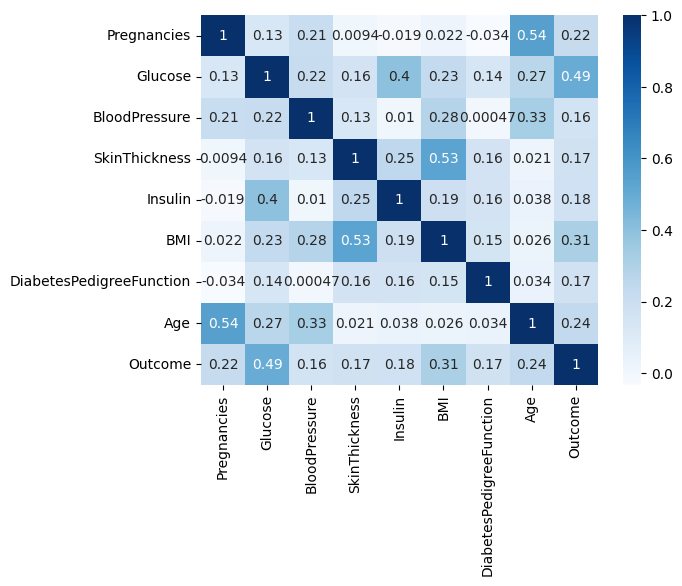

In [23]:
corr = pima[pima.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

### Boxplots

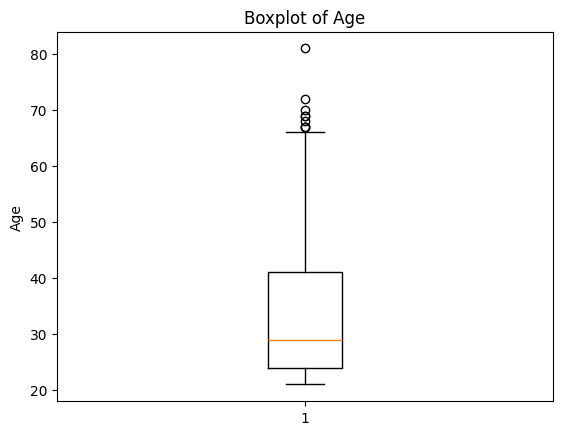

In [25]:
import matplotlib.pylab as plt

plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

array([[<Axes: title={'center': 'Age'}, xlabel='[Outcome]'>,
        <Axes: title={'center': 'BMI'}, xlabel='[Outcome]'>,
        <Axes: title={'center': 'BloodPressure'}, xlabel='[Outcome]'>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}, xlabel='[Outcome]'>],
       [<Axes: title={'center': 'Glucose'}, xlabel='[Outcome]'>,
        <Axes: title={'center': 'Insulin'}, xlabel='[Outcome]'>,
        <Axes: title={'center': 'Pregnancies'}, xlabel='[Outcome]'>,
        <Axes: title={'center': 'SkinThickness'}, xlabel='[Outcome]'>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

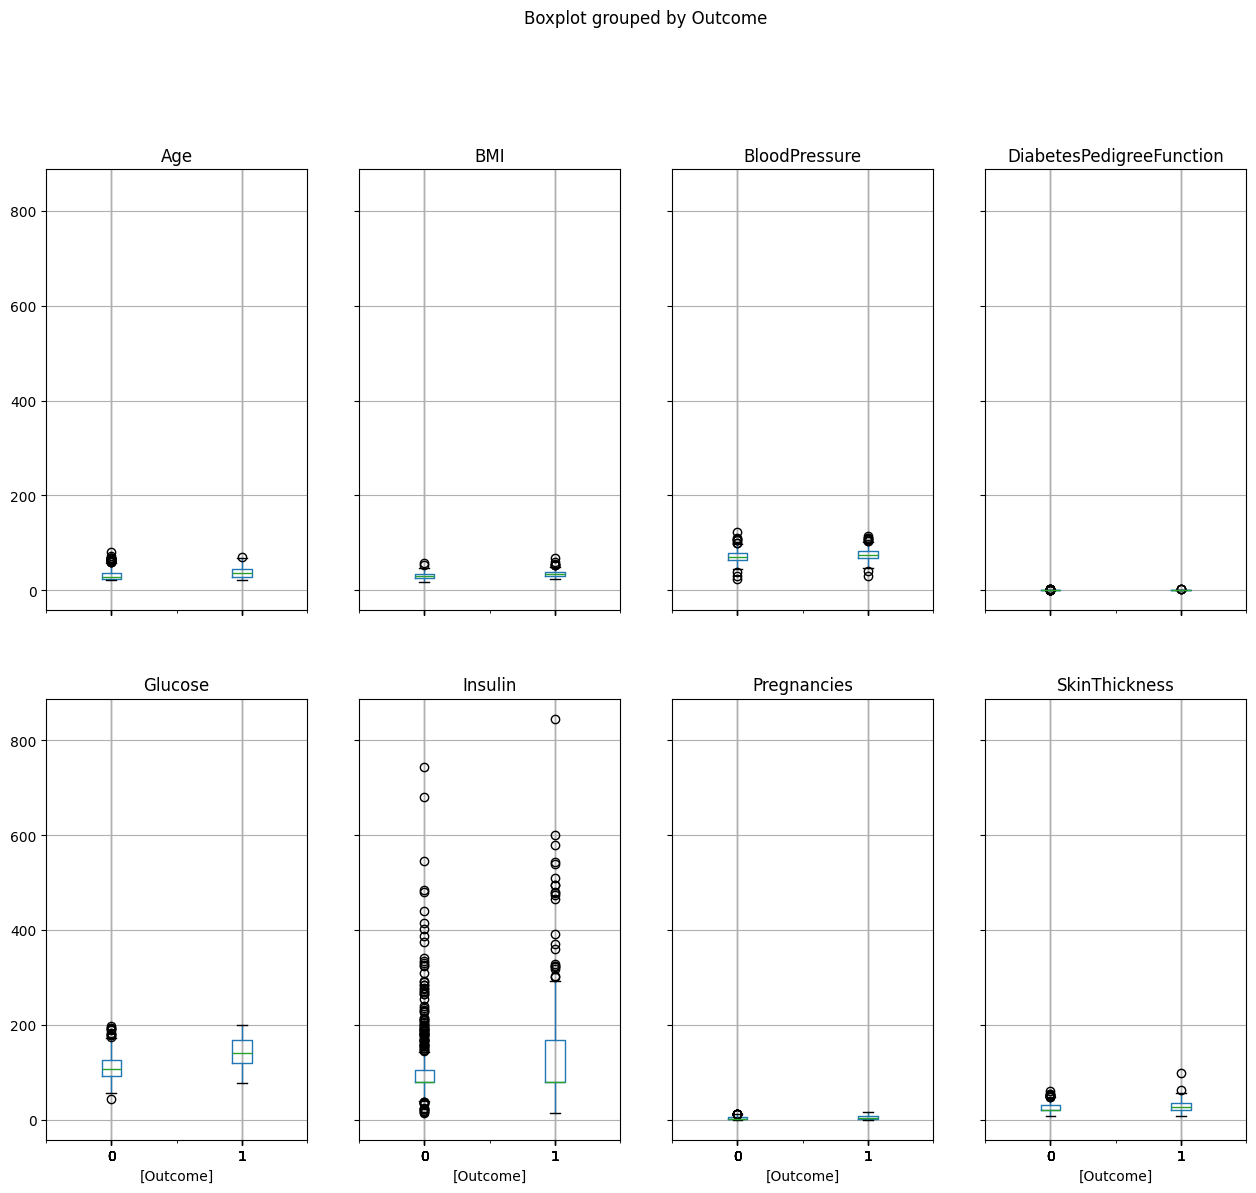

In [26]:
pima.boxplot(by = 'Outcome',  layout=(3,4), figsize=(15, 20))

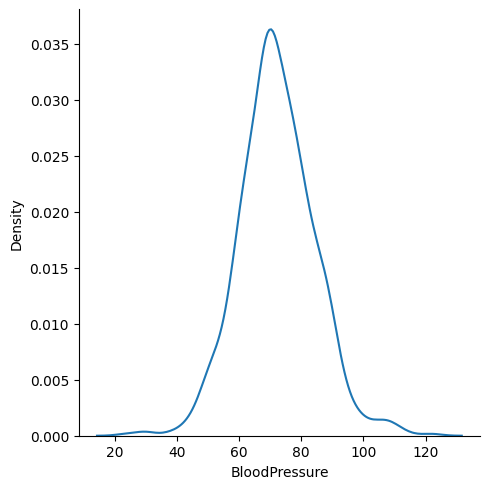

In [21]:
sns.displot(pima['BloodPressure'], kind='kde')

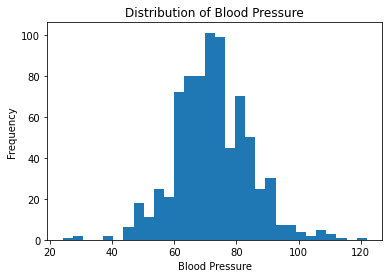

In [25]:
import matplotlib.pyplot as plt

# plot the histogram
# specify the number of bins, using 'bins' parameter
plt.hist(pima['BloodPressure'], bins= 30)

# add the graph title and axes labels
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

# display the plot
plt.show()

##### Interpretation: 


- The Blood Pressure feature looks like normaly distributed.

### Analysis

#### 'BMI' of the person having the highest 'Glucose'?

In [27]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

- The person has the highest Glucose is 42.9

#### BMI analysis.
- What is the mean of the variable 'BMI'? 
- What is the median of the variable 'BMI'? 
- What is the mode of the variable 'BMI'?
- Are the three measures of central tendency equal?


In [31]:
# 

m1 = pima['BMI'].mean()  # mean
print(m1)
m2 = pima['BMI'].median()  # median
print(m2)
m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543617
32.0
32.0


In [30]:
m1 = pima['BMI'].mode()  # mean

##### Interpretation: 

- The 3 measures of central tendency, namely mean, median and mode have very similar values.
- So we can say 3 measures are nearly equal

#### How many women's 'Glucose' levels are above the mean level of 'Glucose'?

In [33]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

##### Interpretation: 


- 343 participants.There is no gender variable in here. 
- So if I assumed that all participants are women. Then, there are 343 women have Glucose levels above the mean level.

#### How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'? 

In [38]:
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 14 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               22 non-null     int64  
 1   Glucose                   22 non-null     int64  
 2   BloodPressure             22 non-null     int64  
 3   SkinThickness             22 non-null     int64  
 4   Insulin                   22 non-null     int64  
 5   BMI                       22 non-null     float64
 6   DiabetesPedigreeFunction  22 non-null     float64
 7   Age                       22 non-null     int64  
 8   Outcome                   22 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 1.7 KB


#### Interpretation: 
- 22 participants. In this case partipants assumed are females


#### Plot the scatterplot between 'Glucose' and 'Insulin'.

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

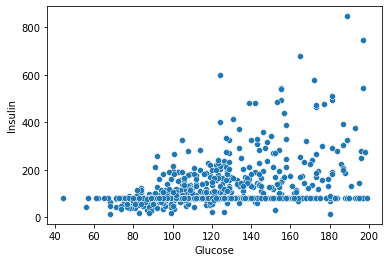

In [43]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
# plt.scatter(x='Glucose',y='Insulin',data=pima)
# plt.show()

- The scatter plot shows that there is a positive linear relationship between Glucose and Insulin

- There are some outliers lying above the upper whisker bar. 
- Indeed, the maximum age is 81 and there is on observation for this value.

## Histograms
-  for the 'Age' variable to understand the number of women in different age groups given whether they have diabetes or not. Explain both histograms and compare them. 

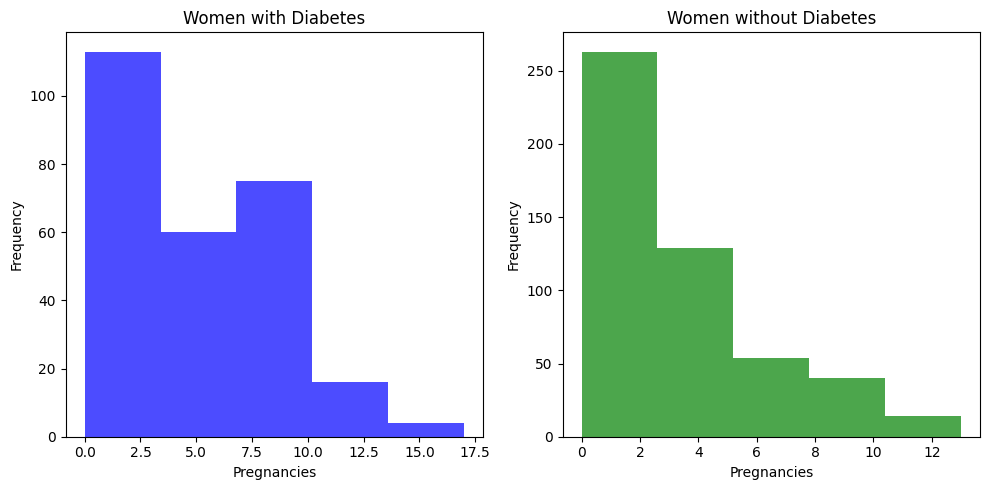

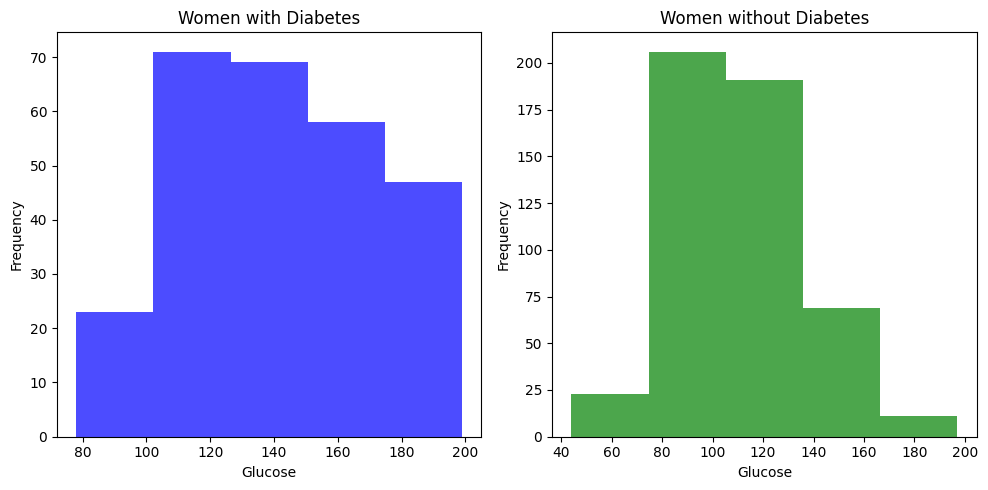

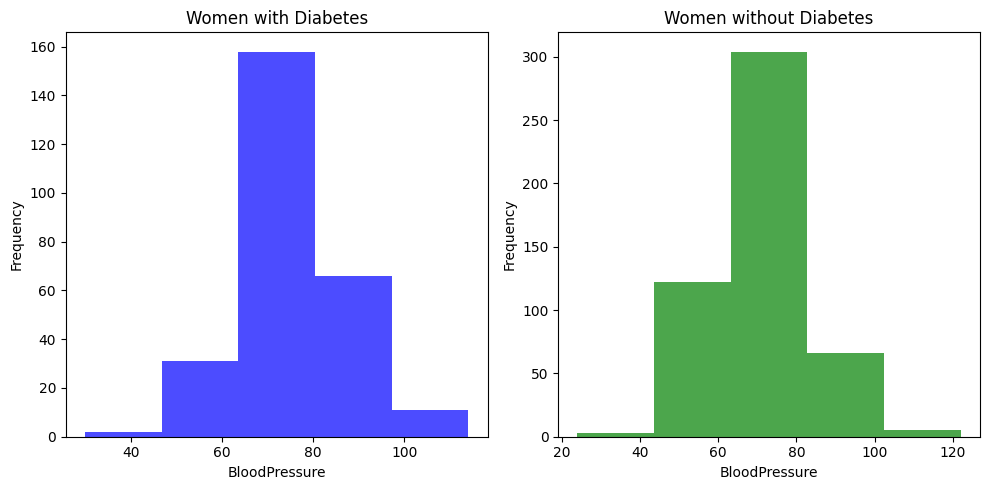

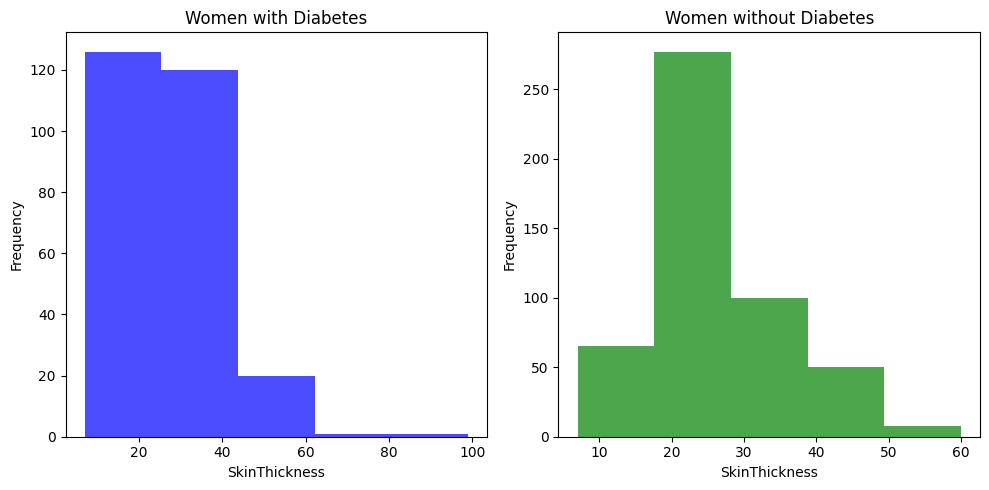

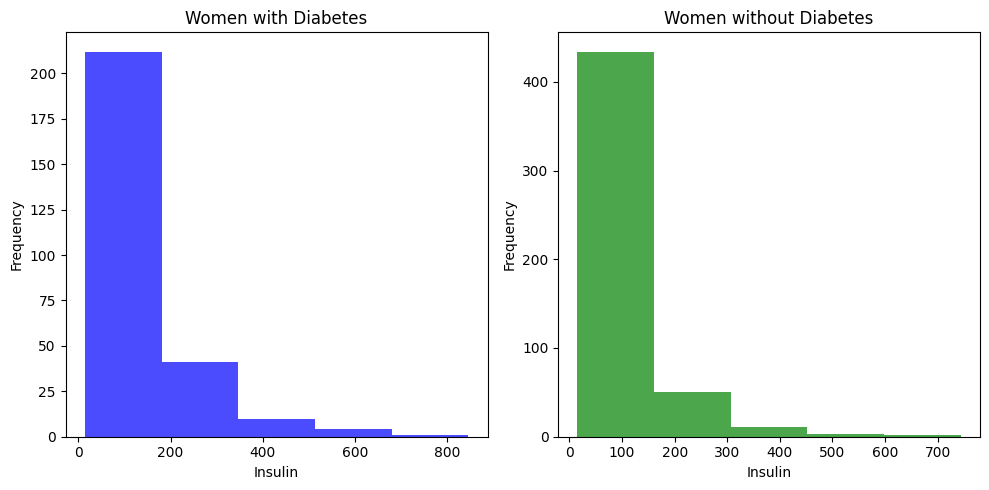

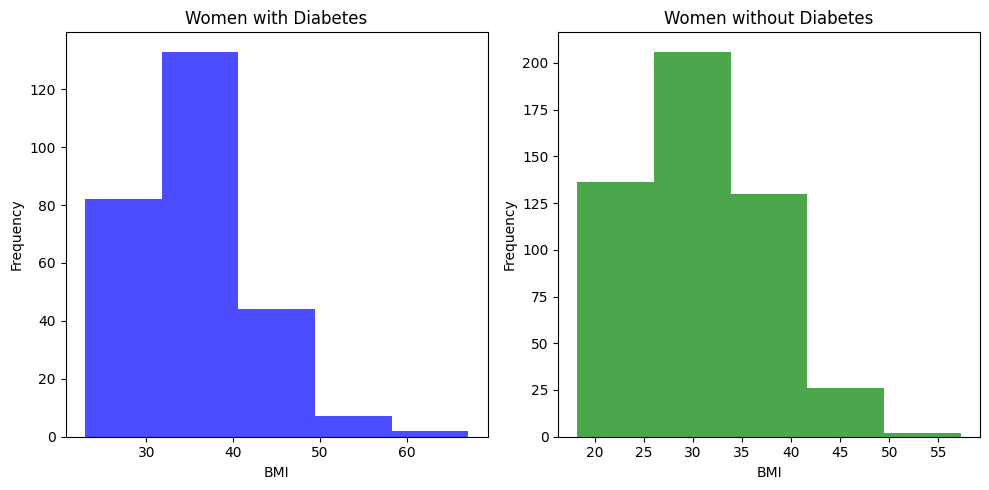

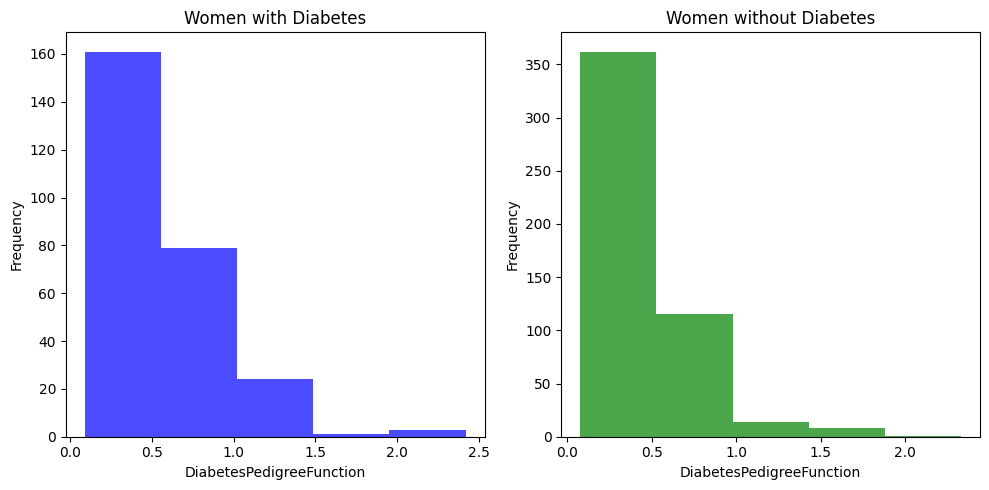

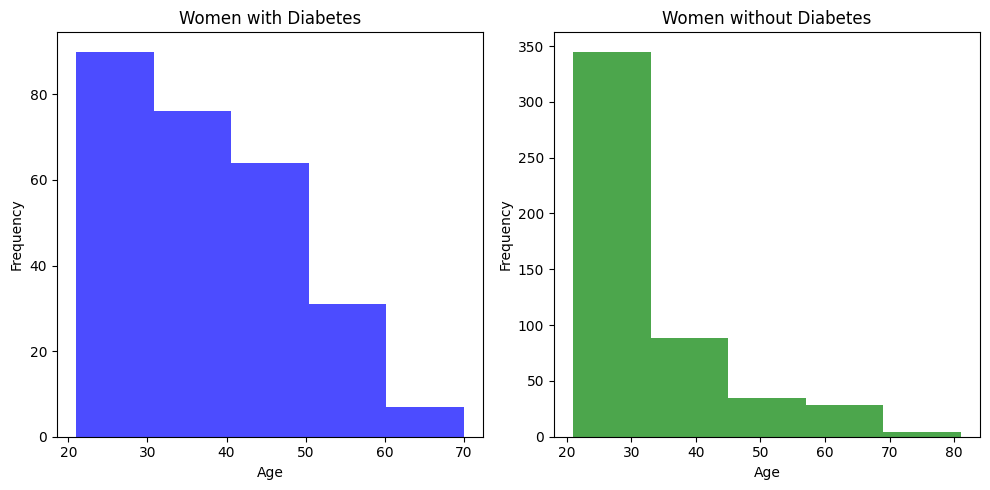

In [31]:
import matplotlib.pyplot as plt


# Filter data for women with diabetes and without diabetes
women_diabetes = pima[pima['Outcome'] == 1]
women_no_diabetes = pima[pima['Outcome'] == 0]

for col in pima.columns:
    if col != "Outcome":
        # Set up the figure and axes
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Plot histogram for women with diabetes
        axes[0].hist(women_diabetes[col], bins=5, color='blue', alpha=0.7)
        axes[0].set_title('Women with Diabetes')
        axes[0].set_xlabel(f"{col}")
        axes[0].set_ylabel('Frequency')

        # Plot histogram for women without diabetes
        axes[1].hist(women_no_diabetes[col], bins=5, color='green', alpha=0.7)
        axes[1].set_title('Women without Diabetes')
        axes[1].set_xlabel(f"{col}")
        axes[1].set_ylabel('Frequency')

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()


In [32]:

# plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
# plt.title('Distribution of Age for Women who do not have Diabetes')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

- From the above histograms, it looks like the frequency of young women/participants from 20 to 30 do not have Diabetes is higher than those with the same age rage. 
- But it women get older, it seems like more women get diabetes.

### IQR

In [50]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q1 - Q3
print(IQR)

Pregnancies                 -5.0000
Glucose                    -40.5000
BloodPressure              -16.0000
SkinThickness              -12.0000
Insulin                    -48.2500
BMI                         -9.1000
DiabetesPedigreeFunction    -0.3825
Age                        -17.0000
Outcome                     -1.0000
dtype: float64


- Interquartile range is the difference between the first and third quartile.
- It is used to measure the variability of the middle half of a variable's distribution. Boxplot is used to visualize the IQR.

##### Interpretation: 


- The results of pairwise correlation showed variables in Pima have weak correlation. 
- The highest positive correlation pair is Age and Pregnacies. There are some negative correlation pairs, such as (DiabetesPedigreeFunction and Pregnacies, Insulin and Pregnacies).